# Project 3 - Supervised Learning and Modeling  

Kelley Breeze



# Introduction  

Start by introducing the idea of supervised learning and describe what the point of using these models is.
You should then discuss the dataset you’ll be using (including where you found it) and the goals/question
you want to answer with your supervised learning models.


In this project we will used supervised learning to build models in order to predict responses from our dataset. Before we get started let's go over a little bit about what supervised learning is, what we want to do with our models, and briefly discuss the dataset that we will be using throughout the project.

### Supervised Learning  
In supervised learning you have a response variable that you are trying to predict. If we fit a predictive model using supervised learning it will be possible to evaluate how well our model predicts the value of our response variable by using observations that were not used in fitting our model.  

### Absenteeism At Work Dataset  

The dataset that we will use contains information about absenteeism at a courier company in Brazil from July 2007 to July 2010. This dataset is from the UC Irvine Machine Learning Repository and can be found [here](https://archive-beta.ics.uci.edu/dataset/445/absenteeism+at+work). It contains 21 variables that are detailed below:  

1.  `ID` - Individual Identification - There are 36 unique employees in the dataset. *This variable will be dropped prior to model building*
2.  `Reason for absence` - **Categorical** - This is the recorded reason for the employee's absence. This is a categorical variable with 28 total levels that has been coded numerically. The values 1-21, corresponding to I through XXI, are taken from the World Health Organization's [International Statistical Classification of Diseases and Related Helth Problems 10 Revision](https://icd.who.int/browse10/2010/en#/). The remaining 7 values of this variable are:  
    -  `22` - patient follow-up  
    -  `23` - medical consultaion  
    -  `24` - blood donation  
    -  `25` - laboratory examination  
    -  `26` - unjustified absence  
    -  `27` - phisiotherapy  
    -  `28` - dental consulation  
    
    Note that there are a total of 43 records for which the `Reason for absence` is recorded as `0`. We will simply refer to these as representing a value of `unkonwn` for our `Reason for absence` variable.  
3.  `Month of absence` - **Categorical** - This is the month in which the absence is registered.  
4.  `Day of the week` - **Categorical** - Work day (Monday through Friday) - Categorical - this is coded numerically with the following values:  
    -  `2` - Monday  
    -  `3` - Tuesday  
    -  `4` - Wednesday  
    -  `5` - Thursday  
    -  `6` - Friday  
5.  `Seasons` - **Categorical** - coded numerically with the following values:  
    -  `1` - summer  
    -  `2` - autumn  
    -  `3` - winter  
    -  `4` - spring  
6. `Transportation expense` - **Numeric** -  This is the monthly transportation expense of each employee in dollars
7. `Distance from Residence to Work` - **Numeric** - This is the distance in kilometers that the employee must travel each day to get to work measured in kilometers.    
8. `Service time`  - **Numeric** - the service time of each employee in years.  
9.  `Age` - **Numeric** - Age of employee in years.  
10. `Work load Average/day` - **Numeric** - This is the average workload per day for the employee, units unknown.  
11. `Hit target` - **Numeric** - This is an achievement percentage for periodic goals for each employee.  
12. `Disciplinary failure (yes=1; no=0)` - **Categorical** - Binary yes/no about whether the employee recieved a disciplinary warning that month.   
13. `Education` - **Categorical/Ordinal** - The highest education level attained by the employee, coded numerically with the following values:  
    -  `1` - high school  
    -  `2` - graduate  
    -  `3` - postgraduate  
    -  `4` - master and doctor  
14. `Son` - **Numeric** - The total number of children of the employee.  
15. `Social drinker` - **Categorical** - This is a binary variable where yes = `1` indicates that the employee is a social drinker and no = `0` indicates that the employee is not a social drinker.  
16. `Social smoker`- **Categorical** - This is a binary variable where yes = `1` indicates that the employee is a social smoker and no = `0` indicates that the employee is not a social smoker.    
17. `Pet` - **Numeric** - This is the number of pets owned by the employee.  
18. `Weight` - ***Numeric** - The employee's weight in kilograms.  
19. `Height` - **Numeric** - The employee's height in centimeters.  
20. `Body mass index` - **Numeric** - The employee's body mass index. *This variable will be dropped as it is highly correlated with weight and height*   
21. `Absenteeism time in hours` - This is our target variable. `Absenteeism time in hours` is a continuous numeric variable representing the number of hours that an employee was absent for a given instance of missed work.  

### Modeling Goals  

Our goal in working with this dataset is to build and test multiple models to predict the number of absentee hours (variable 21) for an employee based on a subset of the available variables (1-20) listed above. We will use five different modeling techniques to build, train, and test models based on the absenteeism at work dataset. We will then compare our models to one another to determine which model is the best at predicting our response variable. 

## Starting Spark Session and Reading in Our Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [6]:
# Reading in the data
absentee_data_pd = pd.read_csv('Absenteeism_at_work.csv', sep = ';')

# Reformatting variable names to replace spaces with _
#absentee_data_pd.columns = absentee_data_pd.columns.str.replace(" ", "_")

# Using the head() method to make sure everything looks as expected
absentee_data_pd.head(100)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28,28,11,3,4,225,26,9,28,306.345,...,0,1,1,0,0,2,69,169,24,3
96,11,7,11,4,4,289,36,13,33,306.345,...,0,1,2,1,0,1,90,172,30,24
97,15,23,11,5,4,291,31,12,40,306.345,...,0,1,1,1,0,1,73,171,25,3
98,33,23,12,3,4,248,25,14,47,261.306,...,0,1,2,0,0,1,86,165,32,1


In [7]:
absentee_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

### Summary Statistics About Our Variables

In [13]:
absentee_data_pd.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [33]:
absentee_data_pd.ID.nunique()

36

In [35]:
absentee_data_pd.Reason_for_absence.value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason_for_absence, dtype: int64

In [20]:
absentee_data_pd.ID.value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64

We can now convert `absentee_data_pd` to a Spark SQL dataframe. We will save this as `absentee_spark_df`.

In [8]:
absentee_spark_df = spark.createDataFrame(absentee_data_pd)
absentee_spark_df.show(5)

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                        

#### Formatting Column Names  

The original dataset contains variable names with spaces. To make things easier let's replace the spaces in any of the column names with `_` to prevent issues that might arise from the spaces being present in our names. First, we will simply create a list where we have replaced any space in a column name with an underscore. We will then use this list

In [9]:
new_columns = list(map(lambda item : item.replace(" ","_"),absentee_spark_df.columns))
print(new_columns)

['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours']


In [10]:
from functools import reduce

absentee_data = reduce(lambda data, column_name: data.withColumnRenamed(absentee_spark_df.columns[column_name], new_columns[column_name]), range(len(absentee_spark_df.columns)), absentee_spark_df)

absentee_data.printSchema()

root
 |-- ID: long (nullable = true)
 |-- Reason_for_absence: long (nullable = true)
 |-- Month_of_absence: long (nullable = true)
 |-- Day_of_the_week: long (nullable = true)
 |-- Seasons: long (nullable = true)
 |-- Transportation_expense: long (nullable = true)
 |-- Distance_from_Residence_to_Work: long (nullable = true)
 |-- Service_time: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Work_load_Average/day_: double (nullable = true)
 |-- Hit_target: long (nullable = true)
 |-- Disciplinary_failure: long (nullable = true)
 |-- Education: long (nullable = true)
 |-- Son: long (nullable = true)
 |-- Social_drinker: long (nullable = true)
 |-- Social_smoker: long (nullable = true)
 |-- Pet: long (nullable = true)
 |-- Weight: long (nullable = true)
 |-- Height: long (nullable = true)
 |-- Body_mass_index: long (nullable = true)
 |-- Absenteeism_time_in_hours: long (nullable = true)



In [11]:
absentee_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,740,18.017567567567568,11.021247263063655,1,36
Reason_for_absence,740,19.216216216216218,8.433405882799654,0,28
Month_of_absence,740,6.324324324324325,3.4362869319125893,0,12
Day_of_the_week,740,3.9148648648648647,1.4216747097562803,2,6
Seasons,740,2.5445945945945945,1.111831060157382,1,4
Transportation_expense,740,221.32972972972973,66.95222324531973,118,388
Distance_from_Residence_to_Work,740,29.63108108108108,14.836788436739145,5,52
Service_time,740,12.554054054054054,4.384873407621149,1,29
Age,740,36.45,6.47877245761187,27,58


# Splitting the Data, Metrics, and Models  

## Model Metrics

## Splitting the Data into Training and Test Sets   

The goal of creating our supervised models is to be able to successfully predict the number of absentee hours on new data, that is, on data that was not used to train our model. We want our model to be able to generalize to new data. In order to build a model that will be able to generalize we must be careful to not overfit our model to the data used to build it. If we build a model that is perfect at predicting our response variable based on data that was used to build the model, but largely fails to predict our response variable when new data is used to generate predictions, it is clear to see that our model will not be very useful. 

One common way to combat the problem of overfitting our model is to split the data into a training set and a test set. The exact split to use for a training vs test set can vary, but it is common to see an 80/20 or 70/30 training vs test set split. Once the data has been split into training and test sets we can use the training set to fit our model. Often we will want to use model metrics to evaluate the predictions produced by our model based on the observations contained in our training set that were used to fit that model.  

Now, let's split our data into training and test sets.  We can do this by using the `.randomSplit()` method on our spark SQL data frame.

In [12]:
train, test = absentee_data.randomSplit([0.8,0.2], seed = 1234)
print(train.count(), test.count())

581 159


## Models  

Statistical learning is used for inference, prediction, classification, and pattern finding based on your data. A statistical learning model is a mathematical representation of some phenomenon on which data has been observed and collected. We will built 5 different classes of supervised statistical learning models to predict the value of our response variable, the number of absentee hours. In this section we will briefly discuss the concepts and ideas involved in each of our five classes of models. In the next section, [Model Fitting Using Spark MLlib](#Model-Fitting-Using-Spark-MLlib), we will build and fit our models on the training data set.

### Model 1  - Multiple Linear Regression  

Resource for polynomial expansion:
https://george-jen.gitbook.io/data-science-and-apache-spark/polynomialexpansion  



### Model 2  - Regression Tree

### Model 3 - Random Forest 

### Model 4  - Gradient Boosted Regression Tree   

### Model 5 - k Nearest Neighbors Regression    

# Model Fitting Using Spark MLlib and `CrossValidation()`

We will be using cross-validation for model selection and hyperparameter tuning.  

First, let's import the required libraries and functions that we will need to build our models. These will be used in all models, additional libraries or functions that are needed for specific models will be imported as needed within each model section.

In [13]:
from pyspark.ml.feature import SQLTransformer, VectorAssembler, StandardScaler
from pyspark.sql.functions import *
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

### Transformations and Preprocessing Using `MLlib` Functions  

The transformations in this section will be used in one or more of our model pipelines.

#### Dropping Variables from Dataset  

We will not use all of the available predictor variables to build our models. We will drop:  
-  `ID` - This is a personal identifier of each employee. As we are concerned with predicting the number of absentee hours for a given instance, `ID` will not be needed to build our model.  
-  `Body_mass_index` - We will drop this variable as it is a function of height and weight, and is highly correlated with both.  

#### Creating Label Column  

The `sqlTransLabel` transformation uses `SQLTransformer()` to create the `label` column in our data set.  

In [263]:
sqlTransLabel = SQLTransformer(
    statement = """
                SELECT *, Absenteeism_time_in_hours AS label FROM __THIS__
                """
)

Let's just do a quick check that this works as expected. We will use `.toPandas()` to display the data frame as a pandas dataframe. This will not change the `absentee_data` dataframe.

#### Standardizing Numeric Variables  

It is important that we standardize our numeric variables before building our models. Some of the predictor variables that we are using have different units and very different scales, such as `Transporation_expense` with a maximum value of `388` compared to `Son` (number of children) with a maximum value of `4`.  

In [438]:
standardScaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")


In [432]:
scaled = sqlTransLabel.transform(absentee_data)

DataFrame[ID: bigint, Reason_for_absence: bigint, Month_of_absence: bigint, Day_of_the_week: bigint, Seasons: bigint, Transportation_expense: bigint, Distance_from_Residence_to_Work: bigint, Service_time: bigint, Age: bigint, Work_load_Average/day_: double, Hit_target: bigint, Disciplinary_failure: bigint, Education: bigint, Son: bigint, Social_drinker: bigint, Social_smoker: bigint, Pet: bigint, Weight: bigint, Height: bigint, Body_mass_index: bigint, Absenteeism_time_in_hours: bigint, label: bigint]

In [434]:
scaled = all_vars_vectorAssembler.transform(scaled)

IllegalArgumentException: Output column features already exists.

In [439]:
scaled_data = standardScaler.fit(scaled)

In [442]:
scaled_data.transform(scaled).toPandas()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,label,features,scaledFeatures
0,11,26,7,3,1,289,36,13,33,239.554,...,1,0,1,90,172,30,4,4,"[11.0, 26.0, 7.0, 3.0, 1.0, 289.0, 36.0, 13.0,...","[0.9980721543980905, 3.0829774306283877, 2.037..."
1,36,0,7,3,1,118,13,18,50,239.554,...,1,0,0,98,178,31,0,0,"[36.0, 0.0, 7.0, 3.0, 1.0, 118.0, 13.0, 18.0, ...","[3.266417959848296, 0.0, 2.037082507572759, 2...."
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,0,89,170,31,2,2,"[3.0, 23.0, 7.0, 4.0, 1.0, 179.0, 51.0, 18.0, ...","[0.27220149665402465, 2.7272492655558813, 2.03..."
3,7,7,7,5,1,279,5,14,39,239.554,...,1,1,0,68,168,24,4,4,"[7.0, 7.0, 7.0, 5.0, 1.0, 279.0, 5.0, 14.0, 39...","[0.6351368255260575, 0.8300323851691812, 2.037..."
4,11,23,7,5,1,289,36,13,33,239.554,...,1,0,1,90,172,30,2,2,"[11.0, 23.0, 7.0, 5.0, 1.0, 289.0, 36.0, 13.0,...","[0.9980721543980905, 2.7272492655558813, 2.037..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,1,0,1,90,172,30,8,8,"[11.0, 14.0, 7.0, 3.0, 1.0, 289.0, 36.0, 13.0,...","[0.9980721543980905, 1.6600647703383624, 2.037..."
736,1,11,7,3,1,235,11,14,37,264.604,...,0,0,1,88,172,29,4,4,"[1.0, 11.0, 7.0, 3.0, 1.0, 235.0, 11.0, 14.0, ...","[0.09073383221800822, 1.3043366052658563, 2.03..."
737,4,0,0,3,1,118,14,13,40,271.219,...,1,0,8,98,170,34,0,0,"[4.0, 0.0, 0.0, 3.0, 1.0, 118.0, 14.0, 13.0, 4...","[0.3629353288720329, 0.0, 0.0, 2.1101873581997..."
738,8,0,0,4,2,231,35,14,39,271.219,...,1,0,2,100,170,35,0,0,"[8.0, 0.0, 0.0, 4.0, 2.0, 231.0, 35.0, 14.0, 3...","[0.7258706577440658, 0.0, 0.0, 2.8135831442663..."


#### Vector Assemblers  

The `all_vars_vectorAssembler` will create a features vector containing all predictor variables from our dataset.

In [80]:
all_vars_vectorAssembler = VectorAssembler(inputCols = ['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', \
                                               'Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', \
                                               'Work_load_Average/day_', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', \
                                               'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index'], \
                                  outputCol = 'features')

In [17]:
#create a feature array by omitting the last column
feature_cols = absentee_data.columns[:-1]
vect_assembler = VectorAssembler(inputCols = feature_cols, outputCol="features")
#Utilize Assembler created above in order to add the feature column
data_w_features = vect_assembler.transform(absentee_data)
data_w_features.show()

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+--------------------+
| ID|Reason_for_absence|Month_of_absence|Day_of_the_week|Seasons|Transportation_expense|Distance_from_Residence_to_Work|Service_time|Age|Work_load_Average/day_|Hit_target|Disciplinary_failure|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Height|Body_mass_index|Absenteeism_time_in_hours|            features|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+--------------------+
| 11|                26|               7|        

### Model 1  - Multiple Linear Regression  

We will use `LinearRegression` from `pyspark.ml.regression` for our MLR model. The parameters available allow for various types of regularization, including none (ordinary least squares), Ridge Regression, Lasso, and Elastic Net. The `regParam` represents the $\lambda$ in the penalty part of the loss function (`elasticNetParam` range of 0 to 1).

In [324]:
# Importing LinearRegression
from pyspark.ml.regression import LinearRegression

In [326]:
# Creating mlr regressor instance for pipeline
mlr_regressor = LinearRegression(featuresCol = 'features', labelCol='label')

In [327]:
# Creating mlr pipeline using all_vars_vectorAssembler and mlr_regressor
mlr_pipeline = Pipeline(stages = [sqlTransLabel, all_vars_vectorAssembler, mlr_regressor])

In [415]:
# Creating mlr param grid for cross validation
mlr_paramGrid = ParamGridBuilder() \
    .addGrid(mlr_regressor.regParam, [0, 0.01, 0.1, 1.0, 10.0]) \
    .addGrid(mlr_regressor.elasticNetParam, [0.0, 0.2, 0.5, 0.7, 1.0]) \
    .build()

In [416]:
# Creating mlr crossvalidator
mlr_crossval = CrossValidator(estimator = mlr_pipeline,
                              estimatorParamMaps = mlr_paramGrid,
                              evaluator = RegressionEvaluator(metricName='rmse'),
                              numFolds=5,
                              seed = 1234)

In [417]:
# Fitting model using the mlr cross validator that we created
mlr_cv_model = mlr_crossval.fit(train)

In [425]:
# MLR model stats
best_mlr_Pipeline = mlr_cv_model.bestModel
best_mlr_Model = best_mlr_Pipeline.stages[2]
print(f"Best MLR Training RMSE: {best_mlr_Model.summary.rootMeanSquaredError}")
print(f"Best MLR Training MAE: {best_mlr_Model.summary.r2}")
best_mlr_Model.explainParam('elasticNetParam')
best_mlr_Model.explainParam('regParam')

Best MLR Training RMSE: 12.655816108446869
Best MLR Training MAE: 0.13280152383129307


'regParam: regularization parameter (>= 0). (default: 0.0, current: 1.0)'

In [378]:
lr_features = all_vars_vectorAssembler.transform(train)
lr = LinearRegression(featuresCol = 'features', labelCol='Absenteeism_time_in_hours')
lr_model = lr.fit(lr_features)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.07125156047196182,-0.5541221998856326,0.06102195611966274,-0.8437874336123358,0.17254097777620764,-0.00030054710621305535,-0.053043221315073226,-0.24084410752599872,0.15175544796452073,-0.007530948581189216,0.12253665980483247,-19.229368832219173,-2.0514413891028282,1.3310642556278778,1.9576518406815737,-1.0333649773588847,-0.7906382321330249,0.8019419864782453,-0.5337395366881208,-2.536688671315052]
Intercept: 109.21283243256491


In [63]:
trainingSummary = lr_model.summary
trainingSummary.residuals.show(5)
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

+-------------------+
|          residuals|
+-------------------+
| 0.8761456246751607|
| 3.2691650348456562|
|  5.800527335682659|
|  -9.78875370172048|
|-11.177985743466124|
+-------------------+
only showing top 5 rows

RMSE: 12.454308
r2: 0.160197


Model 1 Predictions

In [65]:
lr_test = vectorAssembler.transform(test)

In [67]:
preds = lr_model.transform(lr_test)

In [325]:
from pyspark.ml.feature import PolynomialExpansion

### Model 2  - Regression Tree

In [15]:
from pyspark.ml.regression import DecisionTreeRegressor

In [159]:
absentee_data.printSchema()

root
 |-- ID: long (nullable = true)
 |-- Reason_for_absence: long (nullable = true)
 |-- Month_of_absence: long (nullable = true)
 |-- Day_of_the_week: long (nullable = true)
 |-- Seasons: long (nullable = true)
 |-- Transportation_expense: long (nullable = true)
 |-- Distance_from_Residence_to_Work: long (nullable = true)
 |-- Service_time: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Work_load_Average/day_: double (nullable = true)
 |-- Hit_target: long (nullable = true)
 |-- Disciplinary_failure: long (nullable = true)
 |-- Education: long (nullable = true)
 |-- Son: long (nullable = true)
 |-- Social_drinker: long (nullable = true)
 |-- Social_smoker: long (nullable = true)
 |-- Pet: long (nullable = true)
 |-- Weight: long (nullable = true)
 |-- Height: long (nullable = true)
 |-- Body_mass_index: long (nullable = true)
 |-- Absenteeism_time_in_hours: long (nullable = true)



### Model 3 - Random Forest 

In [83]:
from pyspark.ml.regression import RandomForestRegressor

In [267]:
# Creating random forest regressor instance for pipeline
rf_regressor = RandomForestRegressor(featuresCol = 'features', labelCol='label')

In [268]:
# Creating random forest pipeline using all_vars_vectorAssembler and rf_regressor
rf_pipeline = Pipeline(stages = [sqlTransLabel, all_vars_vectorAssembler, rf_regressor])

#### Parameters for Random Forest Model  

There are several possible parameters available for a building the random forest model using `RandomForestRegressor()`. We will specify values/possible values for three parameters, `numTrees`, `featureSubsetStrategy`, and `maxDepth`.  

1.  The `numTrees` parameter - This parameter has a default value of `20` trees. By increasing this value we can bring down the variance in our model as compared to the single regression tree. We will set this value to `100` for our models.  
2.  The `featureSubsetStrategy` parameter - This parameter is the number of features to consider for splits at each tree mode.  Possible values for this parameter are:
    - `auto` - When this parameter is set to `auto` the number of features will automatically be selected based on the number of trees and the type of model. Our model is a regression model with `100` trees, and as a result `onethird` would be selected automatically. Note that `auto` is the default value for `featureSubsetStrategy`.  
    - `all` - Use all features. If this is selected `RandomForestRegressor()` generates a bagged tree model as opposed to a random forest model.   
    - `onethird` - The number of features to consider for splits at each tree node will be the total number of features in our model divided by three.  This is usually used for regression problems.  
    - `sqrt` - This will use the square root of the number of features for the number of features to consider. This is usually used for classification problems.  
    - `log2` - 
3.  The `maxDepth` parameter - This is the value for the maximum depth of the tree, and can have values ranging from `0` to `30`, with a default value of `5`. The possible values of `maxDepth` that we will use during model selection are `5`, `10`, `15`, `20`, and `25`.  

In [319]:
# Creating param grid for cross validation
rf_paramGrid = ParamGridBuilder() \
    .addGrid(rf_regressor.numTrees, [10]) \
    .addGrid(rf_regressor.featureSubsetStrategy, ['all', 'onethird', 'sqrt', 'log2']) \
    .addGrid(rf_regressor.maxDepth, [5, 10, 15, 20, 25]) \
    .build()

In [320]:
# Creating random forest crossvalidator
rf_crossval = CrossValidator(estimator = rf_pipeline,
                          estimatorParamMaps = rf_paramGrid,
                          evaluator = RegressionEvaluator(metricName='rmse'),
                          numFolds=5)

In [321]:
# Fitting model using the random forest cross validator that we created
rf_cv_model = rf_crossval.fit(train)

In [318]:
best_rf_Pipeline = rf_cv_model.bestModel
best_rf_Model = best_rf_Pipeline.stages[2]
print(f"Best Model Number of Trees: {best_rf_Model.getNumTrees}")
print(f"Best Model Max Depth: {best_rf_Model.getMaxDepth()}")
print(f"Best Model Feature Subset: {best_rf_Model.explainParam('featureSubsetStrategy')}")
print(f"Best Model Max Bins: {best_rf_Model.getMaxBins}")

Best Model Number of Trees: 10
Best Model Max Depth: 5
Best Model Feature Subset: featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 'n' (when n is in the range (0, 1.0], use n * number of features. When n is in the range (1, number of features), use n features). default = 'auto' (default: auto, current: log2)
Best Model Max Bins: <bound method _DecisionTreeParams.getMaxBins of RandomForestRegressionModel: uid=RandomForestRegressor_2310159c98ca, numTrees=10, numFeatures=20>


In [301]:
best_rf_Model.explainParam('featureSubsetStrategy')

"featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 'n' (when n is in the range (0, 1.0], use n * number of features. When n is in the range (1, number of features), use n features). default = 'auto' (default: auto, current: sqrt)"

In [314]:
best_rf_Model.explainParam('featureSubsetStrategy')

"featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 'n' (when n is in the range (0, 1.0], use n * number of features. When n is in the range (1, number of features), use n features). default = 'auto' (default: auto, current: sqrt)"

In [248]:
feature_list = ['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average/day_',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index']

Text(0.5, 1.0, 'Feature Importances')

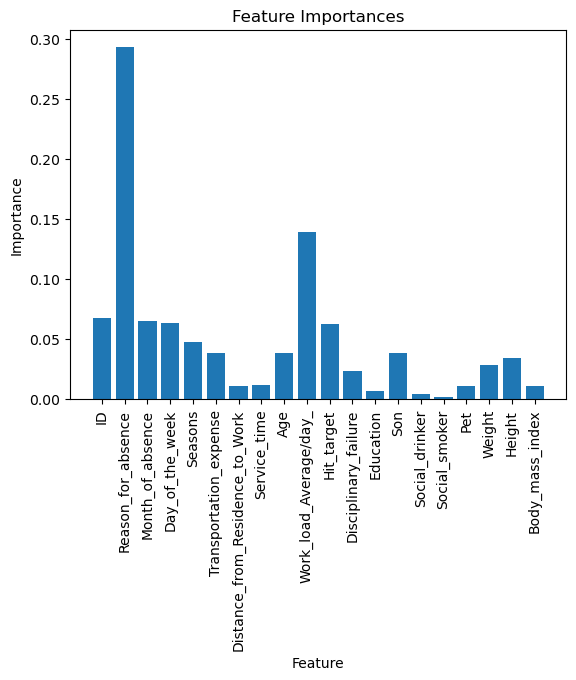

In [250]:
importances = best_rf_Model.featureImportances

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

In [204]:
print(best_rf_Model)

VectorAssembler_b2a16110667e


In [128]:
# Using Pipeline to train on our training set
rf_model = rf_pipeline.fit(train)

In [135]:
train_rf = rf_model.transform(train)

In [136]:
train_rf_eval = RegressionEvaluator(labelCol = 'Absenteeism_time_in_hours')
train_rf_rmse = train_rf_eval.evaluate(train_rf, {train_rf_eval.metricName:'rmse'})
train_rf_mae = train_rf_eval.evaluate(train_rf,{train_rf_eval.metricName:'mae'})

print(f"Random Forest RMSE: {train_rf_rmse}")
print(f"Random Forest MAE: {train_rf_mae}")

Random Forest RMSE: 9.880168540281394
Random Forest MAE: 4.348008526883441


In [129]:
# test model on test set
rf_pred = rf_model.transform(test)

In [93]:
rf_pred.toPandas()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,features,prediction
0,1,23,8,5,1,235,11,14,37,205.917,...,1,0,0,1,88,172,29,4,"[1.0, 23.0, 8.0, 5.0, 1.0, 235.0, 11.0, 14.0, ...",4.279018
1,2,28,8,6,1,235,29,12,48,205.917,...,1,0,1,5,88,163,33,8,"[2.0, 28.0, 8.0, 6.0, 1.0, 235.0, 29.0, 12.0, ...",3.643568
2,3,23,10,4,4,179,51,18,38,253.465,...,0,1,0,0,89,170,31,8,"[3.0, 23.0, 10.0, 4.0, 4.0, 179.0, 51.0, 18.0,...",2.788034
3,5,19,9,3,1,235,20,13,43,241.476,...,1,1,0,0,106,167,38,8,"[5.0, 19.0, 9.0, 3.0, 1.0, 235.0, 20.0, 13.0, ...",10.164765
4,6,11,7,5,1,189,29,13,33,239.554,...,2,0,0,2,69,167,25,8,"[6.0, 11.0, 7.0, 5.0, 1.0, 189.0, 29.0, 13.0, ...",10.189508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,22,27,6,6,3,179,26,9,30,275.089,...,0,0,0,0,56,171,19,2,"[22.0, 27.0, 6.0, 6.0, 3.0, 179.0, 26.0, 9.0, ...",3.231718
155,23,0,5,4,3,378,49,11,36,237.656,...,2,0,1,4,65,174,21,0,"[23.0, 0.0, 5.0, 4.0, 3.0, 378.0, 49.0, 11.0, ...",5.958150
156,25,16,4,3,3,235,16,8,32,246.288,...,0,0,0,0,75,178,25,3,"[25.0, 16.0, 4.0, 3.0, 3.0, 235.0, 16.0, 8.0, ...",9.400370
157,34,8,6,6,1,118,10,10,37,275.089,...,0,0,0,0,83,172,28,2,"[34.0, 8.0, 6.0, 6.0, 1.0, 118.0, 10.0, 10.0, ...",8.979252


### Model 4  - Gradient Boosted Regression Tree

In [46]:
from pyspark.ml.regression import GBTRegressor

### Model 5 - kNN Model  

# Model Testing  

In this section we will determine the best overall model for predicting the number of absentee hours.

### Model 1 - MLR 

In [ ]:
MLR_eval = RegressionEvaluator(labelCol = 'Absenteeism_time_in_hours')
MLR_rmse = MLR_eval.evaluate(pred, {MLR_eval.metricName:'rmse'})
MLR_mae =MLR_eval.evaluate(pred,{MLR_eval.metricName:'mae'})

### Model 2 - Regression Tree 

### Model 3 - Random Forest  

In [130]:
rf_eval = RegressionEvaluator(labelCol = 'Absenteeism_time_in_hours')
rf_rmse = rf_eval.evaluate(rf_pred, {rf_eval.metricName:'rmse'})
rf_mae = rf_eval.evaluate(rf_pred,{rf_eval.metricName:'mae'})

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")

Random Forest RMSE: 10.907451309871483
Random Forest MAE: 4.946910017569946


### Model 4 - Gradient Boosted Regression Tree   

### Model 5 - kNN